#Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [ ]:
# Membaca data dari file excel
data_2012 = pd.read_excel('/realisasi-apbn-2012.xlsx')
data_2013 = pd.read_excel('/realisasi-apbn-2013.xlsx')
data_2014 = pd.read_excel('/realisasi-apbn-2014.xlsx')
data_2015 = pd.read_excel('/realisasi-apbn-2015.xlsx')
data_2016 = pd.read_excel('/realisasi-apbn-2016.xlsx')

# Melihat 5 baris pertama dari masing-masing dataset
print(data_2012.head())
print(data_2013.head())
print(data_2014.head())
print(data_2015.head())
print(data_2016.head())

              Nama Program / Kegiatan / Sub Kegiatan  Anggaran (Rp)  \
0  PROGRAM PENINGKATAN DIVERSIFIKASI DAN KETAHANA...            NaN   
1  PENGEMBANGAN SISTEM DISTRIBUSI DAN STABILITAS ...   1.385440e+10   
2    JUMLAH GABUNGAN KELOMPOK TANI YANG DIBERDAYAKAN   9.962000e+09   
3            JUMLAH LUMBUNG PANGAN YANG DIBERDAYAKAN   3.092400e+09   
4                 LAPORAN KONDISI HARGA PANGAN POKOK   2.950000e+08   

   Realisasi Keuangan (Rp)  Realisasi Keuangan %  Realisasi Fisik (%)  
0                      NaN                   NaN                  NaN  
1             1.379989e+10                 99.61                100.0  
2             9.955386e+09                 99.93                100.0  
3             3.076489e+09                 99.49                100.0  
4             2.937360e+08                 99.57                100.0  
              Nama Program / Kegiatan / Sub Kegiatan  Anggaran (Rp)  \
0  PROGRAM PENINGKATAN DIVERSIFIKASI DAN KETAHANA...            NaN   

## Clean Data

In [ ]:
# Data cleaning: removing irrelevant rows and reformatting the data

# Function to clean and format each dataset
def clean_data(df):
    # Dropping irrelevant rows (rows with NaN in key columns)
    df_cleaned = df.dropna(how='all').reset_index(drop=True)

    # Renaming columns correctly
    df_cleaned.columns = [
        'Kode Program/Kegiatan',
        'Nama Program/Kegiatan/Sub Kegiatan',
        'Anggaran (Rp)',
        'Realisasi Keuangan (Rp)',
        'Realisasi Fisik (%)'
    ]

    # Removing any extra header rows that may have been read incorrectly
    df_cleaned = df_cleaned[~df_cleaned['Kode Program/Kegiatan'].str.contains('Kode', na=False)]

    # Resetting index after cleaning
    df_cleaned = df_cleaned.reset_index(drop=True)
    return df_cleaned

# Applying cleaning function to each dataset
cleaned_2012 = clean_data(data_2012)
cleaned_2013 = clean_data(data_2013)
cleaned_2014 = clean_data(data_2014)
cleaned_2015 = clean_data(data_2015)
cleaned_2016 = clean_data(data_2016)

# Checking the cleaned data
cleaned_2012.head(),cleaned_2013.head(),cleaned_2014.head(), cleaned_2015.head(), cleaned_2016.head()


(                               Kode Program/Kegiatan  \
 0  PROGRAM PENINGKATAN DIVERSIFIKASI DAN KETAHANA...   
 1  PENGEMBANGAN SISTEM DISTRIBUSI DAN STABILITAS ...   
 2    JUMLAH GABUNGAN KELOMPOK TANI YANG DIBERDAYAKAN   
 3            JUMLAH LUMBUNG PANGAN YANG DIBERDAYAKAN   
 4                 LAPORAN KONDISI HARGA PANGAN POKOK   
 
    Nama Program/Kegiatan/Sub Kegiatan  Anggaran (Rp)  Realisasi Keuangan (Rp)  \
 0                                 NaN            NaN                      NaN   
 1                        1.385440e+10   1.379989e+10                    99.61   
 2                        9.962000e+09   9.955386e+09                    99.93   
 3                        3.092400e+09   3.076489e+09                    99.49   
 4                        2.950000e+08   2.937360e+08                    99.57   
 
    Realisasi Fisik (%)  
 0                  NaN  
 1                100.0  
 2                100.0  
 3                100.0  
 4                100.0  ,
     

## Analisis Deskriptif

In [ ]:
#analisis deskriptif
def descriptive_analysis(df):
    print("Total Anggaran: ", df['Anggaran (Rp)'].sum())
    print("Total Realisasi Keuangan: ", df['Realisasi Keuangan (Rp)'].sum())
    print("Rata-Rata Realisasi Fisik: ", df['Realisasi Fisik (%)'].mean())

# Terapkan analisis ini pada setiap dataset
print("Analisis Deskriptif untuk Tahun 2012")
descriptive_analysis(cleaned_2012)

print("Analisis Deskriptif untuk Tahun 2013")
descriptive_analysis(cleaned_2013)

print("Analisis Deskriptif untuk Tahun 2014")
descriptive_analysis(cleaned_2014)

print("\nAnalisis Deskriptif untuk Tahun 2015")
descriptive_analysis(cleaned_2015)

print("\nAnalisis Deskriptif untuk Tahun 2016")
descriptive_analysis(cleaned_2016)


Analisis Deskriptif untuk Tahun 2012
Total Anggaran:  65493579000.0
Total Realisasi Keuangan:  2244.34
Rata-Rata Realisasi Fisik:  100.0
Analisis Deskriptif untuk Tahun 2013
Total Anggaran:  35778949230.0
Total Realisasi Keuangan:  1687.94
Rata-Rata Realisasi Fisik:  100.0
Analisis Deskriptif untuk Tahun 2014
Total Anggaran:  57751311790.0
Total Realisasi Keuangan:  2777.76
Rata-Rata Realisasi Fisik:  100.0

Analisis Deskriptif untuk Tahun 2015
Total Anggaran:  86257149039.0
Total Realisasi Keuangan:  3152.6499999999996
Rata-Rata Realisasi Fisik:  98.58735294117648

Analisis Deskriptif untuk Tahun 2016
Total Anggaran:  98663160210
Total Realisasi Keuangan:  2141.3300000000004
Rata-Rata Realisasi Fisik:  100.0


## Visualisasi Data

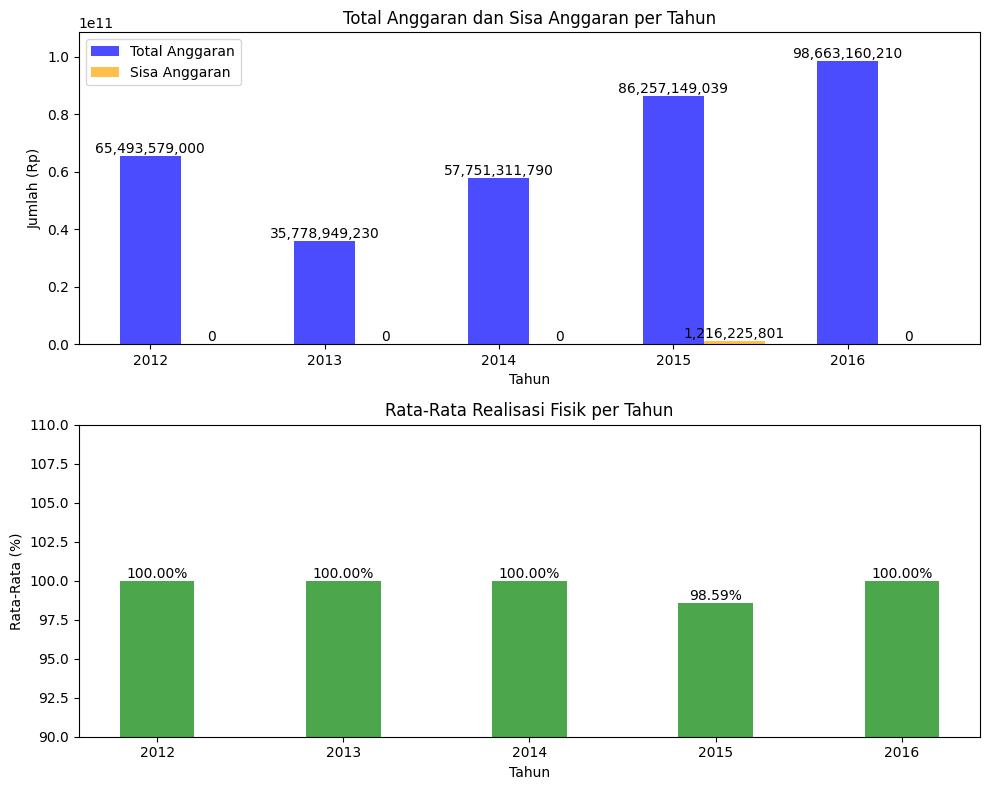

In [ ]:
data = {
    "Tahun": [2012, 2013, 2014, 2015, 2016],
    "Total Anggaran (Rp)": [
        65493579000.0,
        35778949230.0,
        57751311790.0,
        86257149039.0,
        98663160210.0
    ],
    "Rata-Rata Realisasi Fisik (%)": [100.0, 100.0, 100.0, 98.59, 100.0]
}

df = pd.DataFrame(data)

# Hitung sisa anggaran
df['Sisa Anggaran (Rp)'] = df['Total Anggaran (Rp)'] - (df['Total Anggaran (Rp)'] * df['Rata-Rata Realisasi Fisik (%)'] / 100)

# Buat subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Grafik untuk Total Anggaran dan Sisa Anggaran
width = 0.35  # Lebar batang
axs[0].bar(df['Tahun'], df['Total Anggaran (Rp)'], color='blue', alpha=0.7, width=width, label='Total Anggaran')
axs[0].bar(df['Tahun'] + width, df['Sisa Anggaran (Rp)'], color='orange', alpha=0.7, width=width, label='Sisa Anggaran')
axs[0].set_title('Total Anggaran dan Sisa Anggaran per Tahun')
axs[0].set_xlabel('Tahun')
axs[0].set_ylabel('Jumlah (Rp)')
axs[0].set_ylim(0, max(df['Total Anggaran (Rp)'].max(), df['Sisa Anggaran (Rp)'].max()) * 1.1)
axs[0].legend()

# Menambahkan data label di atas batang
for i in range(len(df)):
    axs[0].text(df['Tahun'][i], df['Total Anggaran (Rp)'][i], f'{df["Total Anggaran (Rp)"][i]:,.0f}', ha='center', va='bottom')
    axs[0].text(df['Tahun'][i] + width, df['Sisa Anggaran (Rp)'][i], f'{df["Sisa Anggaran (Rp)"][i]:,.0f}', ha='center', va='bottom')

# Grafik untuk Rata-Rata Realisasi Fisik
axs[1].bar(df['Tahun'], df['Rata-Rata Realisasi Fisik (%)'], color='green', alpha=0.7, width=0.4)
axs[1].set_title('Rata-Rata Realisasi Fisik per Tahun')
axs[1].set_xlabel('Tahun')
axs[1].set_ylabel('Rata-Rata (%)')
axs[1].set_ylim(90, 110)

# Menambahkan data label di atas batang
for i in range(len(df['Rata-Rata Realisasi Fisik (%)'])):
    axs[1].text(df['Tahun'][i], df['Rata-Rata Realisasi Fisik (%)'][i], f'{df["Rata-Rata Realisasi Fisik (%)"][i]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()